In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yelp_labelled.txt', header=None, sep='\t')
df.columns = ('Review','Score')

In [3]:
df.head()

,Review,Score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
pd.options.display.max_rows = 999
common = pd.Series(' '.join(df['Review']).lower().split()).value_counts()[:200]


In [5]:
common
#good, great, 'will go', 'best', nice, friendly, **deifnitely, love, would recommend, would go, 
#will be, will definitely, would definitely, am definitely , awesome, excellent, 
#disappointed, perfect, amazing, absolutely **

the              582
and              388
i                303
was              292
a                237
to               216
is               171
this             142
of               125
not              115
it               110
for              107
in               104
food              92
we                79
place             77
very              74
my                72
with              71
be                66
so                66
had               66
good              62
are               62
that              62
were              61
have              61
but               61
great             57
you               56
they              56
service           56
at                55
on                54
like              45
our               41
go                40
will              37
as                36
here              36
back              36
all               35
time              35
just              34
really            33
an                32
their             31
if           

In [6]:
good_keywords=['good','great','will go','best','nice','friendly','definitely','love','loved','liked','would recommend','would go','will be','will definitely','would definitely','am definitely','awesome','excellent','perfect','amazing','absolutely']

for words in good_keywords:
    df[str(words)] = df.Review.str.contains(
    ' ' + str(words) + ' ',
    case=False
    )

In [7]:
df.head()

,Review,Score,good,great,will go,best,nice,friendly,definitely,love,...,would go,will be,will definitely,would definitely,am definitely,awesome,excellent,perfect,amazing,absolutely
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df['B_Score'] = (df.Score == 1)

In [9]:
df.head()

,Review,Score,good,great,will go,best,nice,friendly,definitely,love,...,will be,will definitely,would definitely,am definitely,awesome,excellent,perfect,amazing,absolutely,B_Score
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


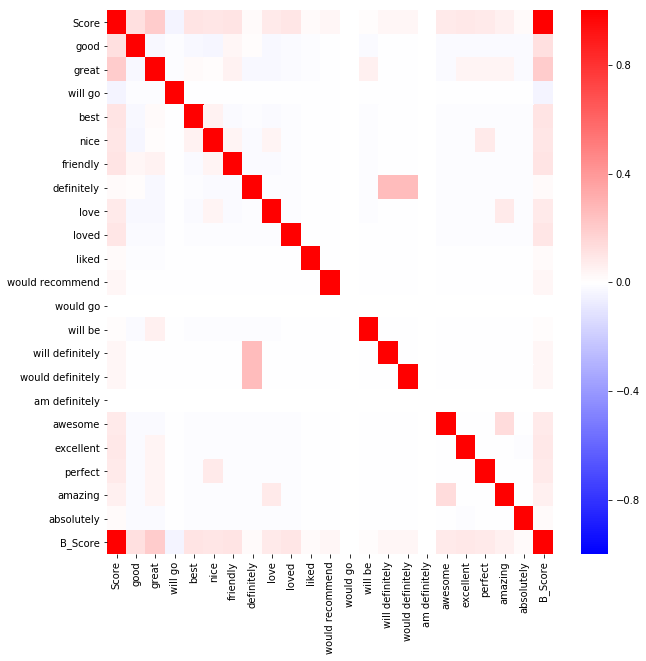

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'bwr', vmin = -1, vmax = 1)

In [11]:
data = df[good_keywords]
target = df.B_Score

In [12]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data,target)
y_pred = bnb.predict(data)
print ("Number of correctly labeled reviews out of a total of {} reviews: {}".format(
    data.shape[0],
    (target == y_pred).sum()
))

Number of correctly labeled reviews out of a total of 1000 reviews: 643


In [13]:
##question for rod: is this looking at any situation 

In [14]:
#Test on amazon dataset
df2 = pd.read_csv('amazon_cells_labelled.txt', header=None, sep='\t')
df2.columns = ('Review','Score')
df2['B_Score'] = (df.Score == 1)
df2.head()

,Review,Score,B_Score
0,So there is no way for me to plug it in here i...,0,True
1,"Good case, Excellent value.",1,False
2,Great for the jawbone.,1,False
3,Tied to charger for conversations lasting more...,0,True
4,The mic is great.,1,True


In [15]:
for words in good_keywords:
    df2[str(words)] = df2.Review.str.contains(
    ' ' + str(words) + ' ',
    case=False
    )
    
data2 = df2[good_keywords]
target2 = df2.B_Score

In [16]:
bnb2 = BernoulliNB()
bnb2.fit(data2,target2)
y_pred2 = bnb2.predict(data2)
print ("Number of correctly labeled reviews out of a total of {} reviews: {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))

Number of correctly labeled reviews out of a total of 1000 reviews: 536


In [17]:
#barely better than coinflip for amazon reviews



In [18]:
#### Iterating and Evaluation Classifier
#### 

from sklearn.metrics import confusion_matrix
#yelp1 amazon2
cm1 = confusion_matrix(target,y_pred)
cm2 = confusion_matrix(target2,y_pred2)
print(' {}\n\n {}'.format(cm1,cm2))

 [[473  27]
 [330 170]]

 [[456  44]
 [420  80]]


In [19]:
from sklearn.metrics import classification_report
#yelp1 amazon2
cm1 = classification_report(target,y_pred)
cm2 = classification_report(target2,y_pred2)
print(' {}\n\n {}'.format(cm1,cm2))

               precision    recall  f1-score   support

       False       0.59      0.95      0.73       500
        True       0.86      0.34      0.49       500

   micro avg       0.64      0.64      0.64      1000
   macro avg       0.73      0.64      0.61      1000
weighted avg       0.73      0.64      0.61      1000


               precision    recall  f1-score   support

       False       0.52      0.91      0.66       500
        True       0.65      0.16      0.26       500

   micro avg       0.54      0.54      0.54      1000
   macro avg       0.58      0.54      0.46      1000
weighted avg       0.58      0.54      0.46      1000



In [20]:
#473 negative flagged as negative
#27 negaitve flagged as positive (false positive)
#330 positive flagged as negative
#170 positive flagged as positive



In [21]:
#with amazon, higher percent of false positives, higher percent of misses

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)

array([0.61 , 0.615, 0.62 , 0.665, 0.65 ])

In [22]:
cross_val_score(bnb2, data2, target2, cv=5)

array([0.52 , 0.53 , 0.52 , 0.52 , 0.535])

In [23]:
#Overfitting does not appear to be an issue

In [24]:
df.head()

,Review,Score,good,great,will go,best,nice,friendly,definitely,love,...,will be,will definitely,would definitely,am definitely,awesome,excellent,perfect,amazing,absolutely,B_Score
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [25]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
#phrases package from gemsim get 2/3 word phrases

In [26]:
finder = BigramCollocationFinder.from_words(df['Review'])

finder.apply_freq_filter(2)
finder.nbest(bigram_measures.pmi, 100)

[]

In [27]:
dfbad = df.loc[(df.Score == 0)]
dfgood = df.loc[(df.Score == 1)]

In [28]:
dfbad.shape[0]

500

In [29]:
dfbad.head()

,Review,Score,good,great,will go,best,nice,friendly,definitely,love,...,will be,will definitely,would definitely,am definitely,awesome,excellent,perfect,amazing,absolutely,B_Score
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
commonbad = pd.Series(' '.join(dfbad['Review']).lower().split()).value_counts()
commongood = pd.Series(' '.join(dfgood['Review']).lower().split()).value_counts()

In [31]:
commongood

the                    309
and                    222
was                    137
i                      117
a                      112
is                     104
to                      86
this                    76
great                   57
in                      57
of                      52
good                    48
very                    46
food                    44
for                     41
it                      41
with                    41
place                   40
are                     36
so                      35
were                    34
had                     34
you                     34
we                      34
my                      33
have                    32
they                    32
on                      31
service                 30
all                     24
be                      22
our                     22
really                  21
best                    21
that                    20
but                     20
time                    19
t

In [32]:
cg = commongood.to_frame()
cb = commonbad.to_frame()
cg

,0
the,309
and,222
was,137
i,117
a,112
is,104
to,86
this,76
great,57
in,57


In [160]:
#merge = cb.join(cg, how='outer')
merge=cb.merge(cg, how='outer', left_index=True, right_index=True)
merge.reset_index(inplace = True)
merge.columns = ('Word','Bad','Good')

merge['Sum'] = merge.Bad + merge.Good
#merge.sort_values(by=['Sum'], ascending = False, inplace = True)
merge['bad_to_good'] = merge.Bad / merge.Good
merge['good_to_bad'] = merge.Good / merge.Bad
merge['max'] = (merge[['bad_to_good','good_to_bad']].max(axis=1))**2.5
merge['weighted_importance'] = merge['max']*merge['Sum']**(1)
merge.sort_values(by=['weighted_importance'], ascending = False, inplace = True)
merge['Score'] = merge['good_to_bad'] - merge['bad_to_good']
#merge['Score'] = merge.Good / merge.Sum
#merge['alt_score'] = ((merge[['Bad','Good']].max(axis=1))/(merge[['Bad','Good']].min(axis=1))-1)*((merge.Good - merge.Bad)**0)
merge_final = merge[['Word', 'Score']][:250]
merge.dropna()

,Word,Bad,Good,Sum,bad_to_good,good_to_bad,max,weighted_importance,Score
293,being,13.0,1.0,14.0,13.000000,0.076923,609.338166,8530.734318,-12.923077
1601,no,21.0,2.0,23.0,10.500000,0.095238,357.250831,8216.769113,-10.404762
301,best,2.0,21.0,23.0,0.095238,10.500000,357.250831,8216.769113,10.404762
1612,not,97.0,18.0,115.0,5.388889,0.185567,67.413686,7752.573873,-5.203322
2687,worst,12.0,1.0,13.0,12.000000,0.083333,498.830633,6484.798224,-11.916667
1592,nice,2.0,17.0,19.0,0.117647,8.500000,210.643137,4002.219607,8.382353
722,don't,22.0,3.0,25.0,7.333333,0.136364,145.630911,3640.772767,-7.196970
989,friendly,2.0,16.0,18.0,0.125000,8.000000,181.019336,3258.348048,7.875000
153,another,9.0,1.0,10.0,9.000000,0.111111,243.000000,2430.000000,-8.888889
2454,too,9.0,1.0,10.0,9.000000,0.111111,243.000000,2430.000000,-8.888889


In [161]:
#def activit():
    #Keywds = [word for word in merge.Word[:25]]
        #Keywds = df[str(word)] 
   #return activit
#activit()
#merge_final.head()
merge_final.loc[merge_final.Word == 'no', 'Score'].iloc[0]

-10.404761904761905

In [162]:
merge_final.head()

,Word,Score
293,being,-12.923077
1601,no,-10.404762
301,best,10.404762
1612,not,-5.203322
2687,worst,-11.916667


In [163]:
Keywds_ = merge_final['Word']
Keywds_

293           being
1601             no
301            best
1612            not
2687          worst
1592           nice
722           don't
989        friendly
153         another
2454            too
522          coming
840           every
981           fresh
1501           menu
1587          never
1049           good
289          before
321             bit
77                5
135         amazing
1556           much
1057            got
1412           love
1226              i
150             and
2388            the
717              do
107           after
198              at
2411          think
1052          good,
2224          spicy
1026        getting
2029           said
884          family
184          around
1616        nothing
2441             to
2671          won't
1285             is
2397          there
2691          would
1287             it
2601            was
2382           that
269              be
407             but
132          always
966             for
366       breakfast


In [164]:
df3 = pd.read_csv('yelp_labelled.txt', header=None, sep='\t')
df3.columns = ('Review','Score')


df3.head()

,Review,Score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [165]:
for wds in Keywds_:
    df3[str(wds)] = 0
    df3[str(wds)][df3.Review.str.contains(wds)] = merge_final.loc[merge_final.Word == wds, 'Score'].iloc[0]
        
        
        
        
        
   # if  df3.Review.str.contains(' ' + str(wds) + ' ',case=False):
        #df3[str(wds)] = 1
 #   else:
      # df3[str(wds)] = 0
   # if (df3.Review.str.contains(' '+words+' ', case=False) == 0):
        #df3[str(words)] = merge_final['Score']
        #df3[str(words)] = merge_final.loc[merge_final.Word == words, 'Score'].iloc[0]
       # df3[words] = 0
   # else:
      #  df3[words] = 123

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
df3['Outcome'] = df3[Keywds_].sum(axis=1)
ocmed = df3.Outcome.median()
#normalize to median 0
df3['Outcome_nml'] = df3['Outcome'] + (ocmed*-1)
df3.Outcome_nml.median()
df3['B_Score'] = (df3.Score == 1)
df3['model_score'] = (df3.Outcome >= 0)
df3['model_score_nml'] = (df3.Outcome_nml >= 0)

In [167]:
df3.head()

,Review,Score,being,no,best,not,worst,nice,don't,friendly,...,any,pizza,say,next,now,Outcome,Outcome_nml,B_Score,model_score,model_score_nml
0,Wow... Loved this place.,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.499734,6.529749,True,True,True
1,Crust is not good.,0,0.0,-10.404762,0.0,-5.203322,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-12.166373,-8.136358,False,False,False
2,Not tasty and the texture was just nasty.,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.307479,5.337494,False,True,True
3,Stopped by during the late May bank holiday of...,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.615185,1.414830,True,False,True
4,The selection on the menu was great and so wer...,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.607033,17.637048,True,True,True


df3.head()

In [171]:
####
# median normalized to 0: False
# top 250 'most significant' words
# ratio (good/bad b/g max) emphasis 2.5
# size emphasis none (^1)
data3 = df3[['model_score']]
target3 = df3.B_Score

bnb3 = BernoulliNB()
bnb3.fit(data3,target3)
y_pred3 = bnb3.predict(data3)
cm3 = confusion_matrix(target3,y_pred3)
cr3 = classification_report(target3,y_pred3)
cvs3 = cross_val_score(bnb3, data3, target3, cv=5)
print ("Number of correctly labeled reviews out of a total of {} reviews: {}".format(
    data3.shape[0],
    (target3 == y_pred3).sum()
))
print(cm3)
print(cr3)
print(cvs3)

Number of correctly labeled reviews out of a total of 1000 reviews: 657
[[421  79]
 [264 236]]
              precision    recall  f1-score   support

       False       0.61      0.84      0.71       500
        True       0.75      0.47      0.58       500

   micro avg       0.66      0.66      0.66      1000
   macro avg       0.68      0.66      0.64      1000
weighted avg       0.68      0.66      0.64      1000

[0.66  0.655 0.62  0.635 0.715]


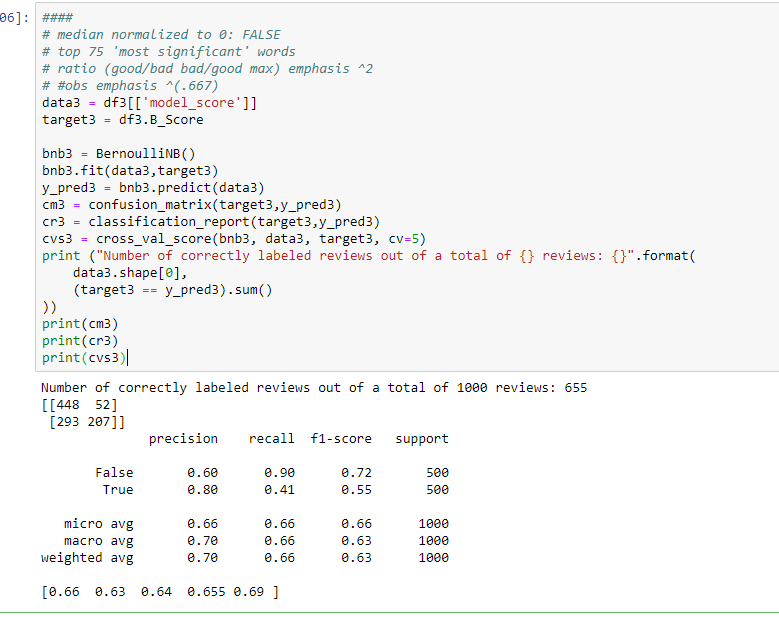

In [185]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = 'C:/Users/dpierce/'
Image(filename = PATH + "nlp_one.png", width=800, height=800)


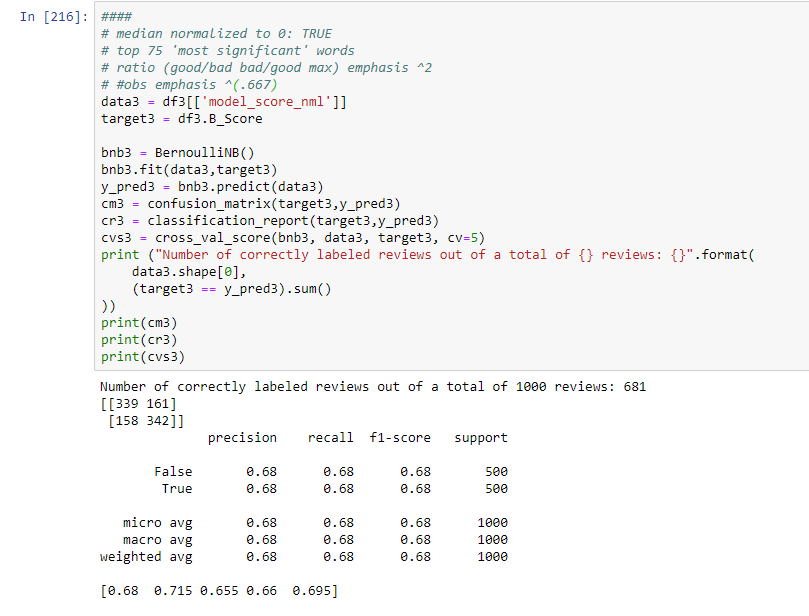

In [182]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = 'C:/Users/dpierce/'
Image(filename = PATH + "nlp_two.png", width=800, height=800)


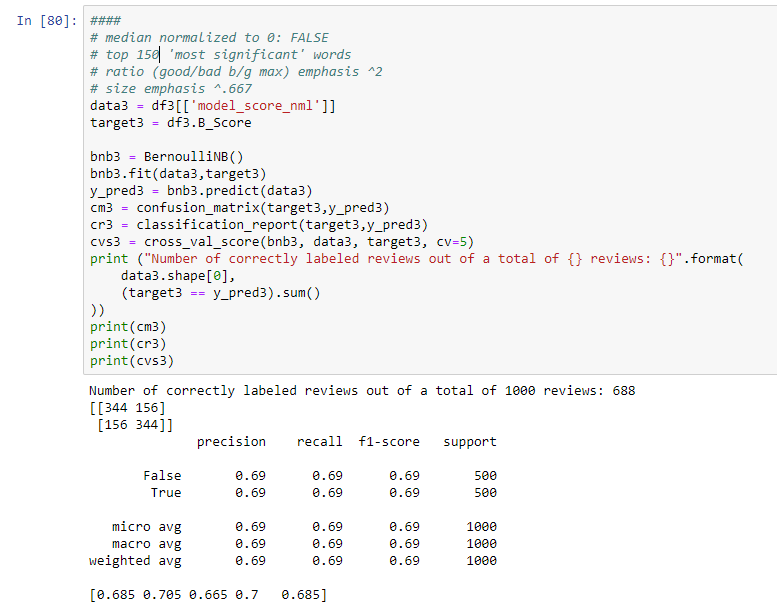

In [180]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = 'C:/Users/dpierce/'
Image(filename = PATH + "nlp_three.png", width=800, height=800)


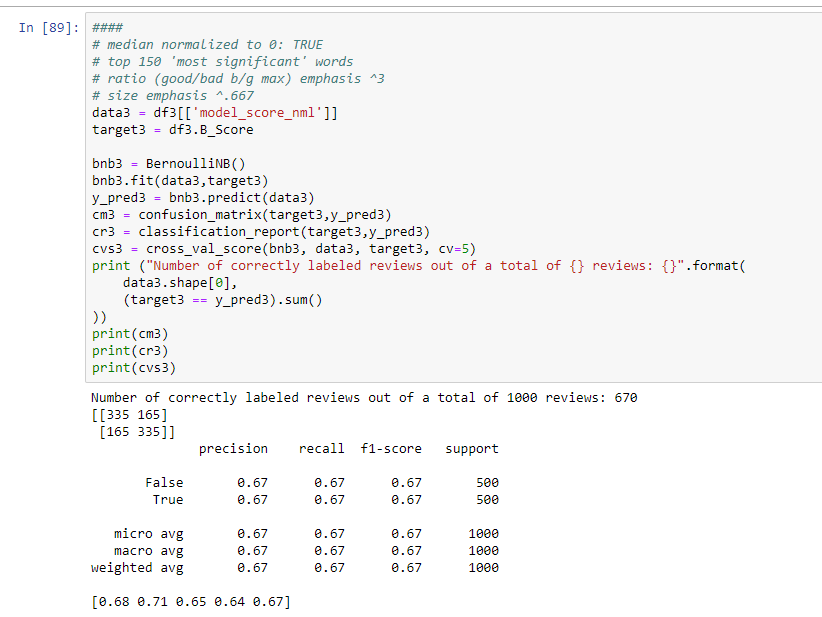

In [181]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = 'C:/Users/dpierce/'
Image(filename = PATH + "nlp_four.png", width=800, height=800)


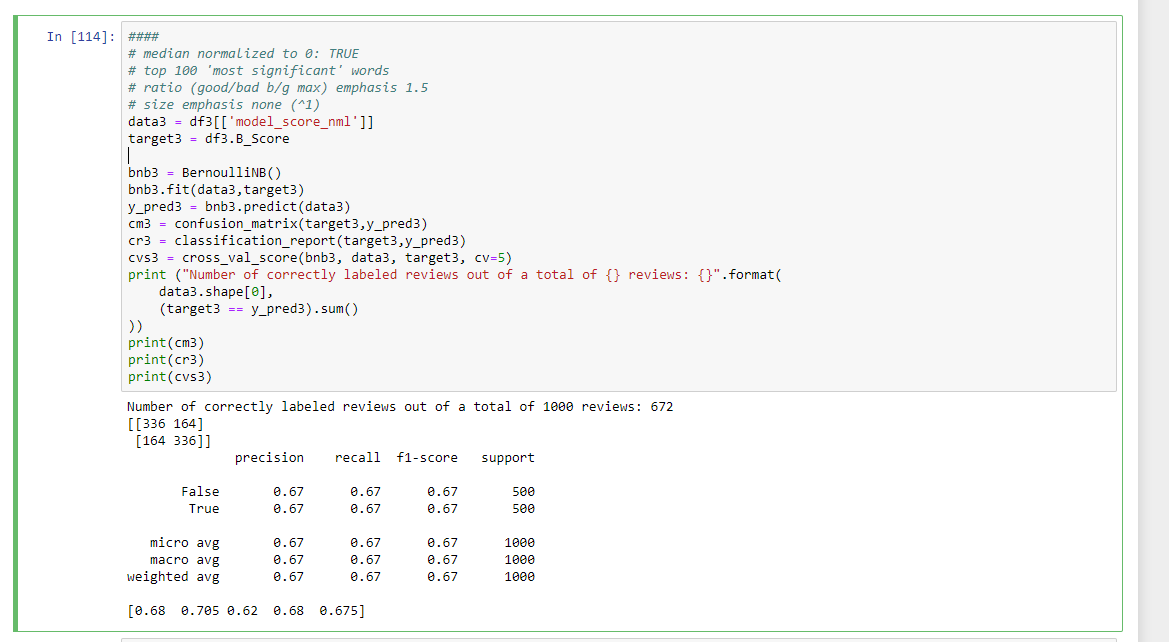

In [186]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = 'C:/Users/dpierce/'
Image(filename = PATH + "nlp_five.png", width=800, height=800)


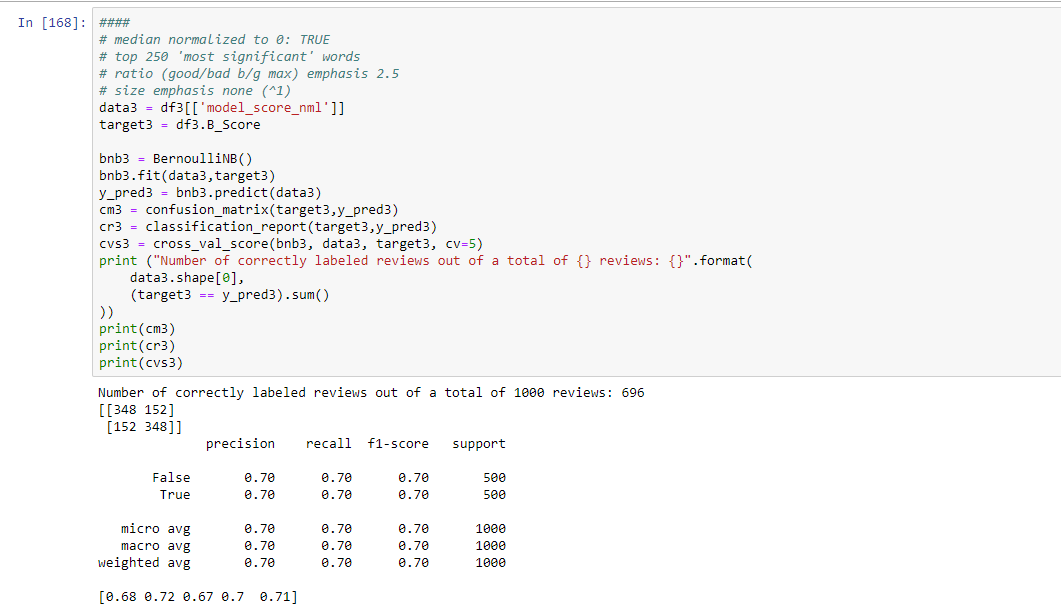

In [187]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = 'C:/Users/dpierce/'
Image(filename = PATH + "nlp_six.png", width=800, height=800)


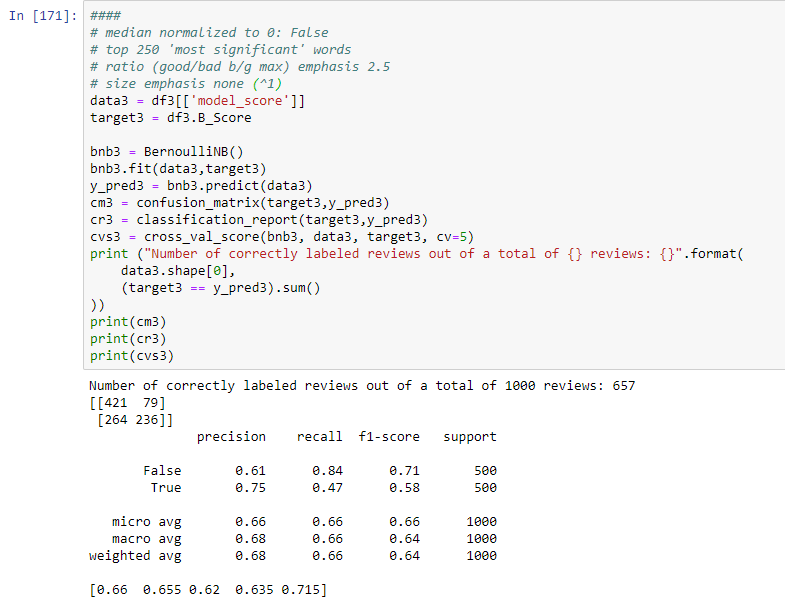

In [188]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = 'C:/Users/dpierce/'
Image(filename = PATH + "nlp_seven.png", width=800, height=800)


In [179]:
###What I want to do:

#First: add in bad words list as negative review identifier
#see what that looks like.

#Then:
#look at ratio of words in good vs. bad reviews. 
#assign 'probability' score based on how muhc more frequently a word is in a positive review vs. negative review
#maybe top 25 (most frequent) words where the difference (in occurence between good and bad) is at least 50%.



#use an iteration where it only uses that score. Try different combos (top 50 at least 25%, top 10 at least 100%, etc.)
#use a separate iteration where it uses that score to only calculate the ones where NO positive or negative words were identified

#HAVING ISSUE merging dataframe (pd.series) to ultimately calculate these ratios.